##Д/з по бэггингу и решающим деревьям

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score 

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# getting somedataset like mnist, return X and y
digits = load_digits()
X, y = digits.data, digits.target
print('размеры X: {}\nразмеры y: {}'.format(X.shape, y.shape))

размеры X: (1797, 64)
размеры y: (1797,)


<Figure size 432x288 with 0 Axes>

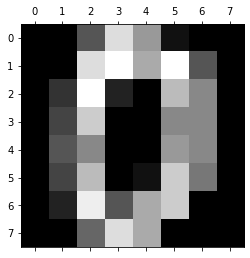

In [3]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

#Визуализация ошибок моделей

In [18]:
from sklearn.model_selection import train_test_split

# plot digits where classifier made mistake.   
def plot_invalid_labels(estimator):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)
    estimator.fit(X_train, y_train)
    predict = estimator.predict(X_test)
    
    fig=plt.figure(figsize=(15, 10))
    columns = 5
    rows = 4
    j = 1
    for i in np.arange(len(predict)):
        p = predict[i]
        a = y_test[i]
        if p != a:
            if j <= rows*columns:
                img = X_test[i].reshape((8,8))
                fig.add_subplot(rows, columns, j)
                plt.imshow(img)
                plt.xticks([])
                plt.yticks([])
                fig.tight_layout() 
                plt.title(f"label is {a} pr {p}")
                j+=1
    plt.show() 

#Задание №1

In [5]:
def write_answer_1(score):
  # with ... as ... gerantly will close the file after code
  with open("ans1.txt", "w") as fout:
    fout.write(str(score))

In [6]:
# just evaluate mean 10-fold cross validation score.
def fit_estimator(estimator):
    return cross_val_score(estimator, X, y, cv=10, n_jobs=-1).mean()

In [7]:
from sklearn.tree import DecisionTreeClassifier

# make DecisionTreeClassifier with default settings
tr_cls = DecisionTreeClassifier()
print(fit_estimator(tr_cls))
write_answer_1(fit_estimator(tr_cls))

0.8285754189944134


#Задание №2

In [8]:
def write_answer_2(score):
  with open('ans2.txt','w') as fout:
    fout.write(str(score))

In [9]:
from sklearn.ensemble import BaggingClassifier

# make bagging ensemble on DecisionTreeClassifier with default param
bagging_tr_cls = BaggingClassifier(base_estimator=tr_cls, n_estimators=100, n_jobs=-1)
print(fit_estimator(bagging_tr_cls))
write_answer_2(fit_estimator(bagging_tr_cls))

0.9248324022346368


#Задание 3

In [10]:
X.shape[1]

64

In [11]:
# make bagging ensemble on DecisionTreeClassifier with max_features=\sqrt(d),
# d -- number of features
bagging_tr_cls = BaggingClassifier(base_estimator=tr_cls, n_estimators=100, 
                                   max_features=int(np.sqrt(X.shape[1])), n_jobs=-1)
print(fit_estimator(bagging_tr_cls))

# saving answer
with open('ans3.txt', 'w') as fout:
  fout.write(str(fit_estimator(bagging_tr_cls)))

0.9310024829298571


#Задание 4

In [12]:
# try to select random features not once for the entire tree, 
# but when building each vertex of the tree. 
# Need to remove the selection of a random subset of features in BaggingClassifier 
# and add it to the DecisionTreeClassifier.

tr_cls = DecisionTreeClassifier(max_features=int(np.sqrt(X.shape[1])))
bagging_tr_cls = BaggingClassifier(base_estimator=tr_cls, n_estimators=100, n_jobs=-1)
print(fit_estimator(bagging_tr_cls))

# saving answer
with open('ans4.txt', 'w') as fout:
  fout.write(str(fit_estimator(bagging_tr_cls)))

0.9465611421477342


#Задание №5

In [13]:
# let's compering last bagging_tr_cls with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_cls = RandomForestClassifier(n_estimators=100, max_features=int(np.sqrt(X.shape[1])),
                                n_jobs=-1)
print(fit_estimator(rf_cls))

0.9504562383612661


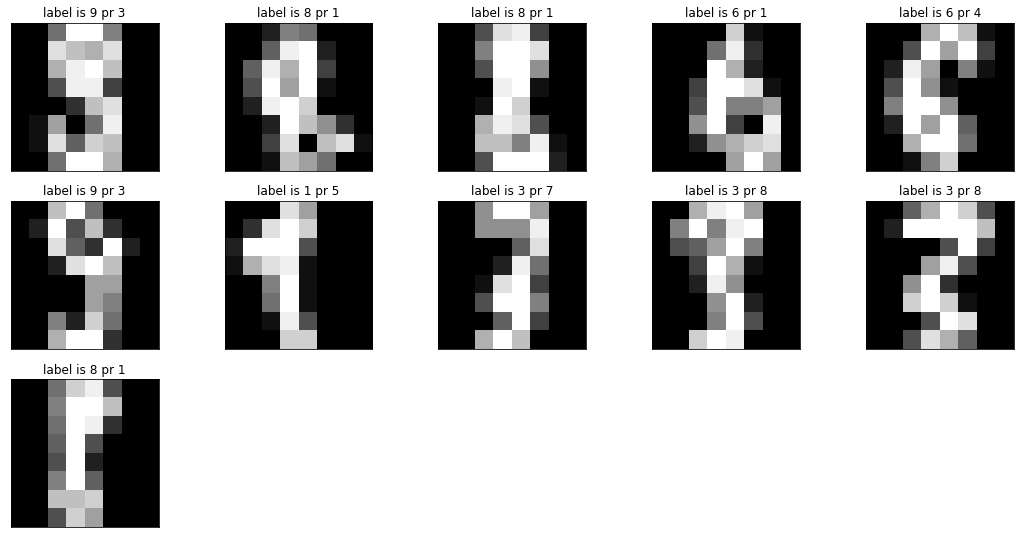

In [19]:
plot_invalid_labels(rf_cls)

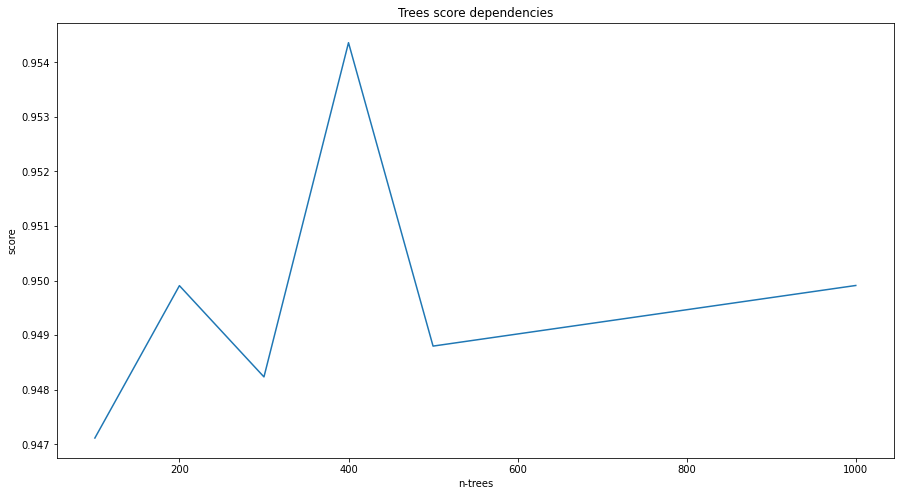

CPU times: user 571 ms, sys: 44.4 ms, total: 616 ms
Wall time: 1min 16s


In [ ]:
%%time
def plot_rf_trees_score():
    trees = [100, 200, 300, 400, 500, 1000]
    results = []
    for tree in trees:
        rf = RandomForestClassifier(n_estimators=tree)
        results.append(fit_estimator(rf))
    plt.figure(figsize=(15, 8))
    plt.plot(trees, results)
    plt.xlabel("n-trees")
    plt.ylabel("score")
    plt.title("Trees score dependencies")
    plt.show()
plot_rf_trees_score()

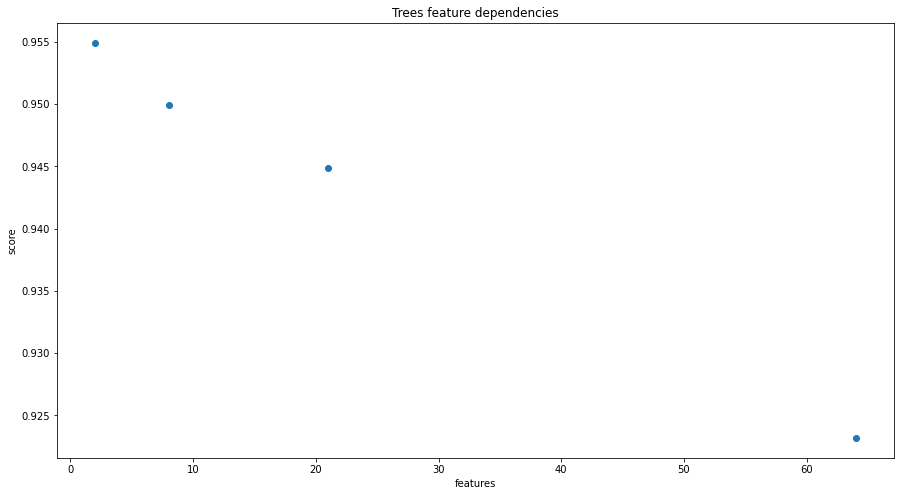

CPU times: user 427 ms, sys: 32.7 ms, total: 460 ms
Wall time: 1min 25s


In [ ]:
%%time
def plot_rf_trees_max_features():
    d = X.shape[1]
    features = [2, int(np.sqrt(d)), int(d/3), d]
    results = []
    for f in features:
        rf = RandomForestClassifier(n_estimators=400, random_state=101, max_features=f)
        results.append(fit_estimator(rf))
    plt.figure(figsize=(15, 8))
    plt.plot(features, results, 'o')
    plt.xlabel("features")
    plt.ylabel("score")
    plt.title("Trees feature dependencies")
    plt.show()
plot_rf_trees_max_features() 

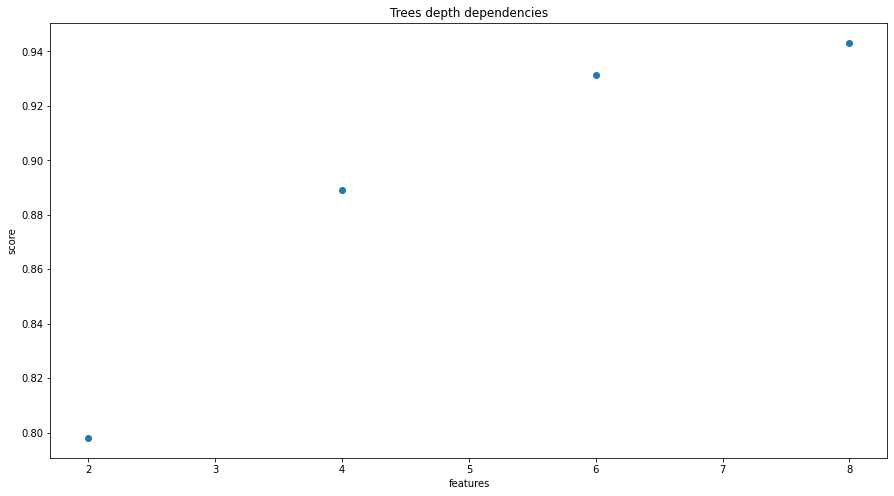

CPU times: user 437 ms, sys: 36.2 ms, total: 474 ms
Wall time: 36.1 s


In [20]:
%%time
def plot_rf_tree_depth():
    d = X.shape[1]
    depth = [2, 4, 6, 8]
    results = []
    for d in depth:
        rf = RandomForestClassifier(n_estimators=400, random_state=101, max_depth=d)
        results.append(fit_estimator(rf))
    plt.figure(figsize=(15, 8))
    plt.plot(depth, results, 'o')
    plt.xlabel("features")
    plt.ylabel("score")
    plt.title("Trees depth dependencies")
    plt.show()
plot_rf_tree_depth() 

In [21]:
with open('ans5.txt', 'w') as fout:
  fout.write('2 3 4 7')